In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


## Color Histogram

In [ ]:
def calculate_color_histogram(image_path, bins=32, show=False):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB

    # Prepare a list for the histogram
    histogram = []

    # Calculate the histogram for each color channel
    for i, color in enumerate(['red', 'green', 'blue']):
        hist = cv2.calcHist([image], [i], None, [bins], [0, 256])
        histogram.append(hist)

        if show:
            plt.plot(hist, color=color)
            plt.xlim([0, bins])

    if show:
        plt.show()

    return histogram

In [ ]:
def process_folder(folder_path, bins=32):
    histograms = {}

    # Walk through the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check for image file extensions
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                histograms[file] = calculate_color_histogram(file_path, bins=bins)

    return histograms


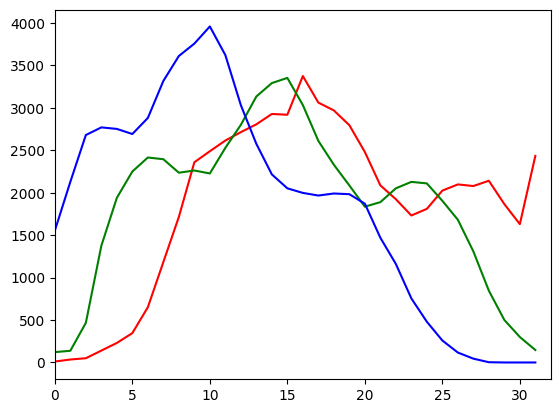

In [ ]:
# Example path to an image
image_path = 'dataset_modified/Animals/6.jpeg'

# Calculate the color histogram and plot it
_ = calculate_color_histogram(image_path, show=True)

## Texture Feature

In [ ]:
def calculate_lbp(image_path, P=8, R=1, method='uniform'):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the LBP image
    lbp_image = local_binary_pattern(image, P, R, method)

    # Calculate the histogram
    lbp_hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, P * R + 3), range=(0, P * R + 2))

    # Normalize the histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-7)

    return lbp_hist

In [ ]:
def process_folder_for_lbp(folder_path, P=8, R=1, method='uniform'):
    lbp_features = {}

    # Walk through the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check for image file extensions
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                lbp_features[file] = calculate_lbp(file_path, P, R, method)

    return lbp_features

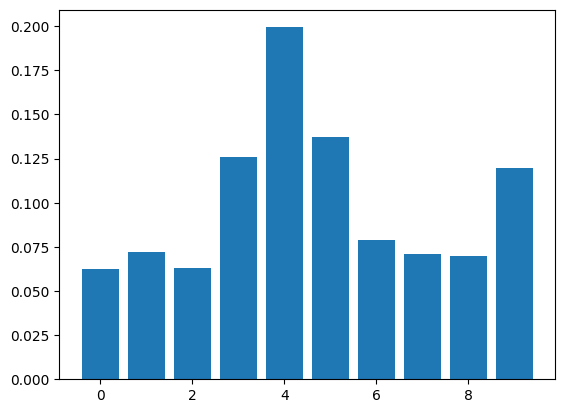

In [ ]:
# Example path to an image
image_path = 'dataset_modified/Animals/6.jpeg'

# Calculate the LBP histogram and plot it
lbp_hist = calculate_lbp(image_path)
plt.bar(range(len(lbp_hist)), lbp_hist)
plt.show()


## Edge Detection

In [ ]:
def calculate_canny_edges(image_path, threshold1=100, threshold2=200):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detector
    edges = cv2.Canny(image, threshold1, threshold2)

    return edges


In [ ]:
def process_folder_for_edges(folder_path, threshold1=100, threshold2=200):
    edge_maps = {}

    # Walk through the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check for image file extensions
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                edge_maps[file] = calculate_canny_edges(file_path, threshold1, threshold2)

    return edge_maps


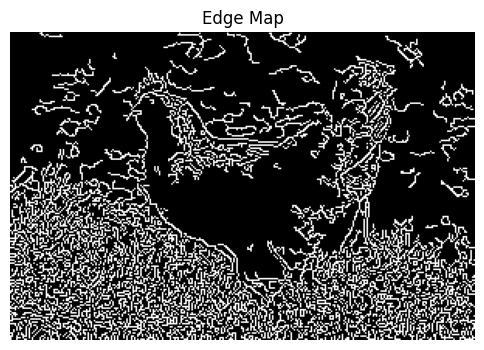

In [ ]:
# Example path to an image
image_path = 'dataset_modified/Animals/6.jpeg'


# Calculate the edges
edges = calculate_canny_edges(image_path)

# Plot the edge map
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Map')
plt.axis('off')  # Hide the axis
plt.show()


#Clustering

In [2]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
labels = dbscan.fit_predict(features)

NameError: name 'features' is not defined

In [ ]:
def display_cluster(images, filenames, labels, cluster_number):
    fig, ax = plt.subplots(1, 10, figsize=(20, 2))
    cluster_indices = np.where(labels == cluster_number)[0]
    for i, idx in enumerate(cluster_indices[:10]):
        ax[i].imshow(images[idx].reshape(64, 64, -1))
        ax[i].axis('off')
        ax[i].set_title(filenames[idx])
    plt.show()

# Display a few clusters
unique_labels = set(labels)
for cluster_number in unique_labels:
    if cluster_number == -1:
        continue  # skipping noise
    display_cluster(images, filenames, labels, cluster_number)